In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run rookie_scraper.ipynb
%run scraper_v2.ipynb

rookie_scraper.ipynb:4: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 4 of the file rookie_scraper.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  "cell_type": "code",
rookie_scraper.ipynb:4: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 4 of the file rookie_scraper.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the B

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


The percentage of players that had a net positive ppg diffrential between rookie and sophomore seasons are 73.58490566037736%


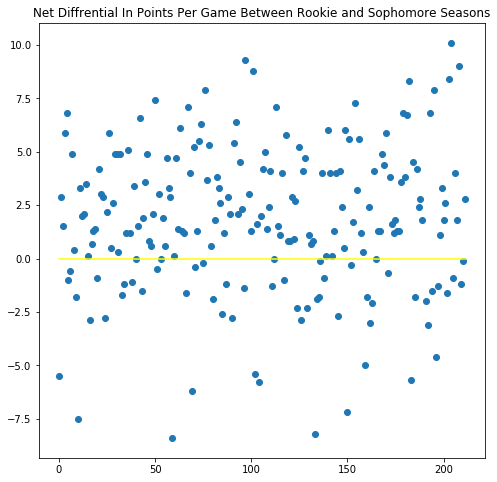

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(names_of_roy_votes)),pd_r_s)
plt.plot(np.arange(0,len(names_of_roy_votes)),np.zeros(len(names_of_roy_votes)),c='yellow')
plt.title("Net Diffrential In Points Per Game Between Rookie and Sophomore Seasons")
pos= np.sum(np.array(pd_r_s) >= 0, axis=0)
per_pos= pos/len(pd_r_s)
print('The percentage of players that had a net positive ppg diffrential between rookie and sophomore seasons are '+ str(per_pos*100) + '%')

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


The percentage of players that had a net positive ppg diffrential between their rookie and first five seasons are 67.45283018867924%


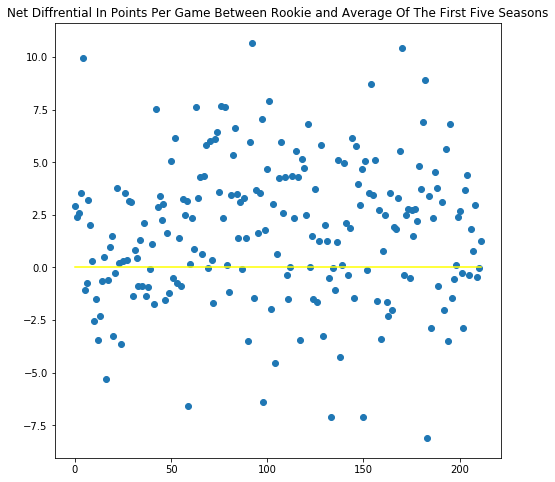

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(names_of_roy_votes)),pd_r_five)
plt.plot(np.arange(0,len(names_of_roy_votes)),np.zeros(len(names_of_roy_votes)),c='yellow')
plt.title("Net Diffrential In Points Per Game Between Rookie and Average Of The First Five Seasons")
pos= np.sum(np.array(pd_r_five) >= 0, axis=0)
per_pos= pos/len(pd_r_five)
print('The percentage of players that had a net positive ppg diffrential between their rookie and first five seasons are '+ str(per_pos*100) + '%')

The percentage of players that had a net positive apg diffrential between rookie and sophomore seasons are 66.50943396226415%


C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


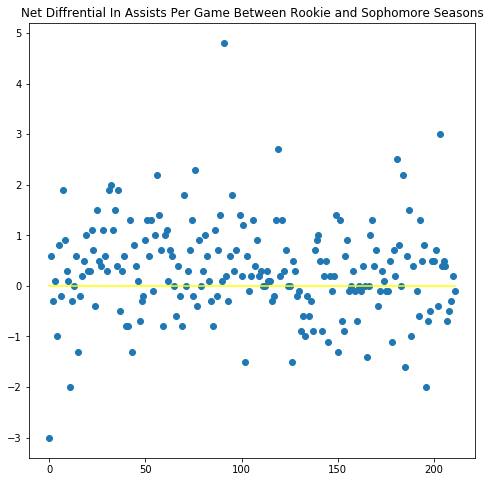

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(names_of_roy_votes)),ad_r_s)
plt.plot(np.arange(0,len(names_of_roy_votes)),np.zeros(len(names_of_roy_votes)),c='yellow')
plt.title("Net Diffrential In Assists Per Game Between Rookie and Sophomore Seasons")
pos= np.sum(np.array(ad_r_s) >= 0, axis=0)
per_pos= pos/len(ad_r_s)
print('The percentage of players that had a net positive apg diffrential between rookie and sophomore seasons are '+ str(per_pos*100) + '%')

C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


The percentage of players that had a net positive apg diffrential between their rookie and first five seasons are 66.50943396226415%


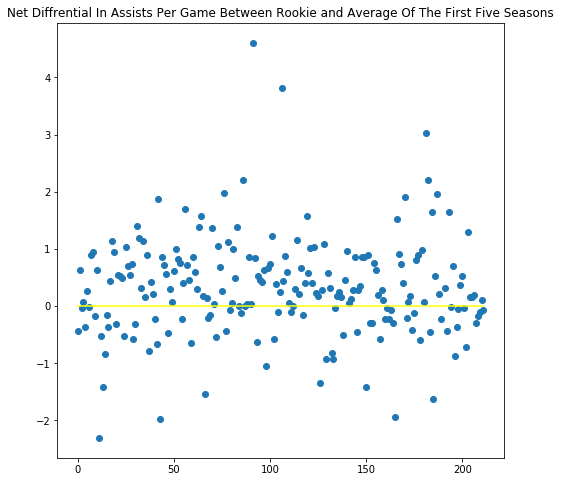

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(names_of_roy_votes)),ad_r_five)
plt.plot(np.arange(0,len(names_of_roy_votes)),np.zeros(len(names_of_roy_votes)),c='yellow')
plt.title("Net Diffrential In Assists Per Game Between Rookie and Average Of The First Five Seasons")
pos= np.sum(np.array(ad_r_five) >= 0, axis=0)
per_pos= pos/len(ad_r_five)
print('The percentage of players that had a net positive apg diffrential between their rookie and first five seasons are '+ str(per_pos*100) + '%')

The percentage of players that had a net positive rpg diffrential between rookie and sophomore seasons are 59.905660377358494%


C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


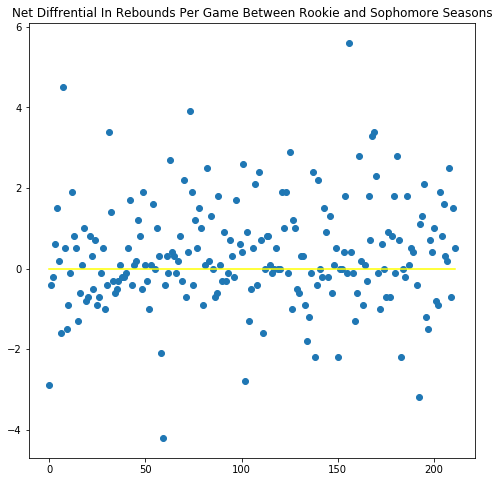

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(names_of_roy_votes)),rd_r_s)
plt.plot(np.arange(0,len(names_of_roy_votes)),np.zeros(len(names_of_roy_votes)),c='yellow')
plt.title("Net Diffrential In Rebounds Per Game Between Rookie and Sophomore Seasons")
pos= np.sum(np.array(rd_r_s) >= 0, axis=0)
per_pos= pos/len(rd_r_s)
print('The percentage of players that had a net positive rpg diffrential between rookie and sophomore seasons are '+ str(per_pos*100) + '%')

The percentage of players that had a net positive rpg diffrential between their rookie and first five seasons are 56.132075471698116%


C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


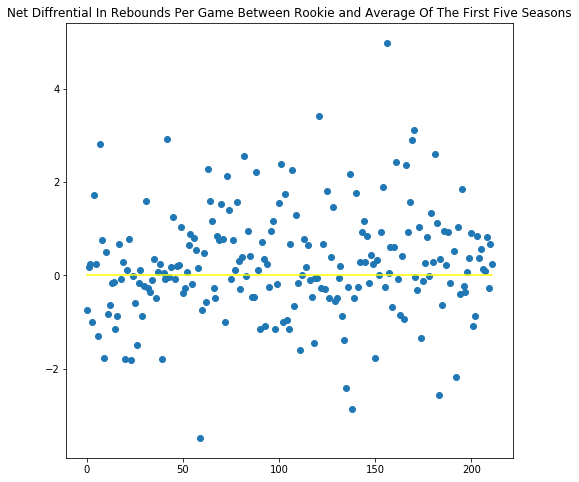

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(names_of_roy_votes)),rd_r_five)
plt.plot(np.arange(0,len(names_of_roy_votes)),np.zeros(len(names_of_roy_votes)),c='yellow')
plt.title("Net Diffrential In Rebounds Per Game Between Rookie and Average Of The First Five Seasons")
pos= np.sum(np.array(rd_r_five) >= 0, axis=0)
per_pos= pos/len(rd_r_five)
print('The percentage of players that had a net positive rpg diffrential between their rookie and first five seasons are '+ str(per_pos*100) + '%')

The percentage of players that had a net positive fg% diffrential between rookie and sophomore seasons are 51.886792452830186%


C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


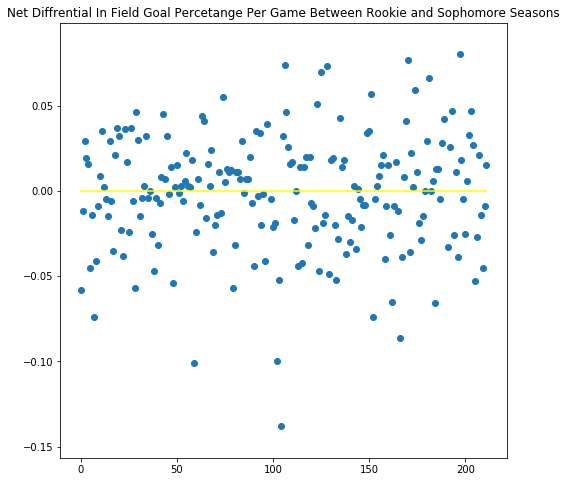

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(names_of_roy_votes)),fgd_r_s)
plt.plot(np.arange(0,len(names_of_roy_votes)),np.zeros(len(names_of_roy_votes)),c='yellow')
plt.title("Net Diffrential In Field Goal Percetange Per Game Between Rookie and Sophomore Seasons")
pos= np.sum(np.array(fgd_r_s) >= 0, axis=0)
per_pos= pos/len(fgd_r_s)
print('The percentage of players that had a net positive fg% diffrential between rookie and sophomore seasons are '+ str(per_pos*100) + '%')

The percentage of players that had a net positive fg% diffrential between their rookie and first five seasons are 52.83018867924528%


C:\Users\sumis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


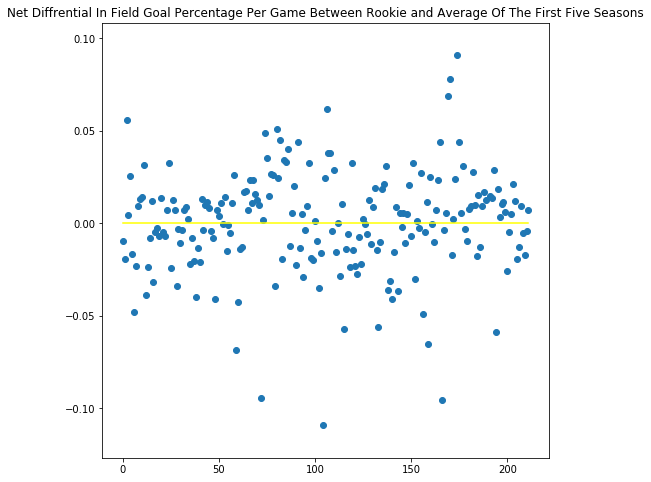

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(np.arange(0,len(names_of_roy_votes)),fgd_r_five)
plt.plot(np.arange(0,len(names_of_roy_votes)),np.zeros(len(names_of_roy_votes)),c='yellow')
plt.title("Net Diffrential In Field Goal Percentage Per Game Between Rookie and Average Of The First Five Seasons")
pos= np.sum(np.array(fgd_r_five) >= 0, axis=0)
per_pos= pos/len(fgd_r_five)
print('The percentage of players that had a net positive fg% diffrential between their rookie and first five seasons are '+ str(per_pos*100) + '%')